<a href="https://colab.research.google.com/github/Aayushi4925/customer_segmentation/blob/main/Copy_of_Copy_of_Online_Retail_Customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name - Online Retail Customer Segmentation
Project Type - Unsupervised ML



Team:

Aayushi Lashkari

Contribution:
1. Perform RFM
2. Model Building 

Vineeta Singh 

1. Data Cleaning
2. EDA

# Project Summary

What is customer segmentation?

Customer segmentation is the process of dividing a broad  consumers or business market, normally consisting of existing and potential customers, into sub groups of consumers based on shared characterstics 


In customer segmentation we categorize similar customers together in the same cluster and analyse them. It can reveal information like:


who are the most valuable customers of the company
what kinds of customers does the company have
This can be used for targeted marketing and other marketing strategies.
Sometimes it can even reveal a potential white space in the market place which no company has yet occupied. Well we can get creative here.

We performed EDA On:-

TOP 5 Product based on the selling.

Bottom 5 Product based on the selling.

Top 5 Stock name based on selling.

Which country had most number of customers.

Most product selling month of a year.

At which time people prefer to go and purchase product according to their feasibility.

**Conlusion**

By applying Kmean and elbow method we found that Optimal number of cluster is k=4 and segregate the new customer, regular purased customers accordingly.




# GitHub Link-

https://github.com/Aayushi4925/customer_segmentation


# Project Title : Extraction/identification of major topics & themes discussed in news articles.

# Problem Description

In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.


# Data Description

## Attribute Information:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.


# General Guidelines : -
Well-structured, formatted, and commented code is required.

Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

The additional credits will have advantages over other students during Star Student selection.

[ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go without a single error logged. ] Each and every logic should have proper comments.

You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.

Chart visualization code Why did you pick the specific chart? What is/are the insight(s) found from the chart? Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason. You have to create at least 15 logical & meaningful charts having important insights. [ Hints : - Do the Vizualization in a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis ]

You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered. Explain the ML Model used and it's performance using Evaluation metric Score Chart. Cross- Validation & Hyperparameter Tuning

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

# Let's Begin !

# Importing Libraries

In [ ]:
# Importing common libraries
import numpy as np #for handling arrays
import pandas as pd #for data manipulation, read_excel
from numpy import math

%matplotlib inline
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns; sns.set()
import seaborn as sns #for better visualizations
from scipy import stats
from datetime import datetime
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load the dataset
df=pd.read_excel('/content/drive/MyDrive/Online Retail.xlsx')

shape of our dataset is (541909, 8) that means we have 541909 number of rows and 8 columns

# Data Inspection

In [ ]:
# checking the data 
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# checking for null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


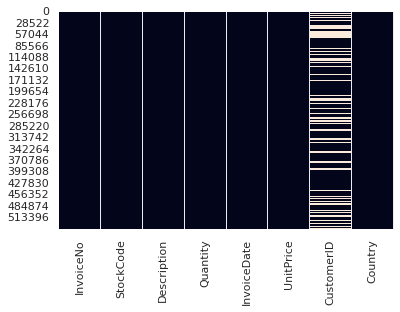

In [ ]:
# checking Null value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# Total null values of CustomerID
df['CustomerID'].isnull().sum()

135080

In [ ]:
# Total null values of Description column
df['Description'].isnull().sum()

1454

There is some null value present in our dataset like in CustomerID and Description

# dataset Information

In [ ]:
# df['InvoiceDate_year'] = df['InvoiceDate'].dt.year
# df['InvoiceDate_month'] = df['InvoiceDate'].dt.month
# df['InvoiceDate_day'] = df['InvoiceDate'].dt.day
# df['InvoiceDate_hour'] = df['InvoiceDate'].dt.hour
# df['InvoiceDate_minute'] = df['InvoiceDate'].dt.minute
# df['InvoiceDate_second'] = df['InvoiceDate'].dt.second

In [ ]:
# Columns and data types
print("Columns and data types")
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object


We have 4 object type, 1 int, 2 float, 1 datetime feature.

In [ ]:
#column names
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
# figuring data types
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

In [ ]:
# categorical columns
categorical_columns=list(df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

In [ ]:
# find unique values of categorical column
def unique_name_no(col):
  print(df[col].unique())
  print(df[col].nunique())


for i in categorical_columns:
  print(i.upper())
  unique_name_no(i)

INVOICENO
[536365 536366 536367 ... 581585 581586 581587]
25900
STOCKCODE
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]
4070
DESCRIPTION
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
4223
COUNTRY
['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']
38


In [ ]:
# duplicate
len(df[df.duplicated()])

5268

In [ ]:
#duplicate records
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


Dataset after removing duplicate values.

In [ ]:
#checking null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are 541909 rows and 8 columns in above dataset.

Above dataset has missing value on Description & CustomerID.

There are 5268 duplicate values.

# Missing Value Imputation

In [ ]:
#dropping missing values
df.dropna(inplace=True)

In [ ]:
#checking null values again
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Now we cleaned null values.

In [ ]:
#records remaining after removing null values
df.shape

(406829, 8)

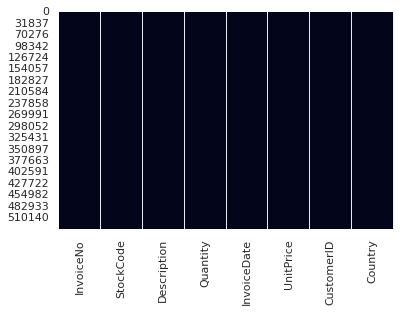

In [ ]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


After removing null and duplicate values in our dataset. It reduces to (401604, 8)

In [ ]:
#treatment of InvoiceNo
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [ ]:
# removing InvoiceNo which contains C
df=df[~df['InvoiceNo'].str.contains('C')]


# we have to drop some InvoiceNo which are starts with 'C' because 'C', it indicates a cancellation

In [ ]:
#rows and columns
df.shape

(397924, 8)

Now after treatment of Dataset, We have 392732 rows and 8 columns.

In [ ]:
#checking distribution
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


There can be outliers in Quantity

# Dataset is ready for EDA.`

# Exploratory data analysis

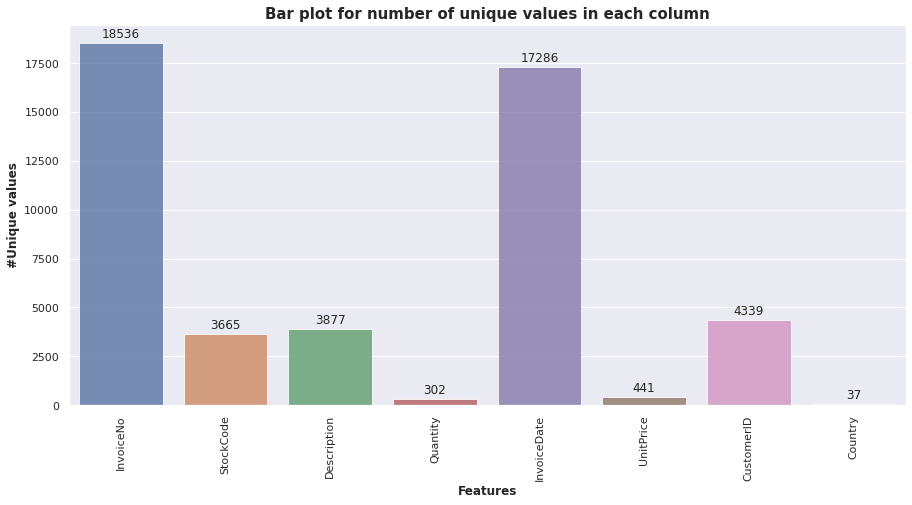

In [ ]:
#Counting unique value of features
unique_df=pd.DataFrame()
unique_df['Features']=df.columns
unique=[]
for i in df.columns:
  unique.append(df[i].nunique())
unique_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

Higher no. of Invoice No is justificable here as it represents no. of customers.

In [ ]:
# Counting unique value of Description name as higher count comes first
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [ ]:
#least count of description name
Description_df.tail()

,Description_Name,Count
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


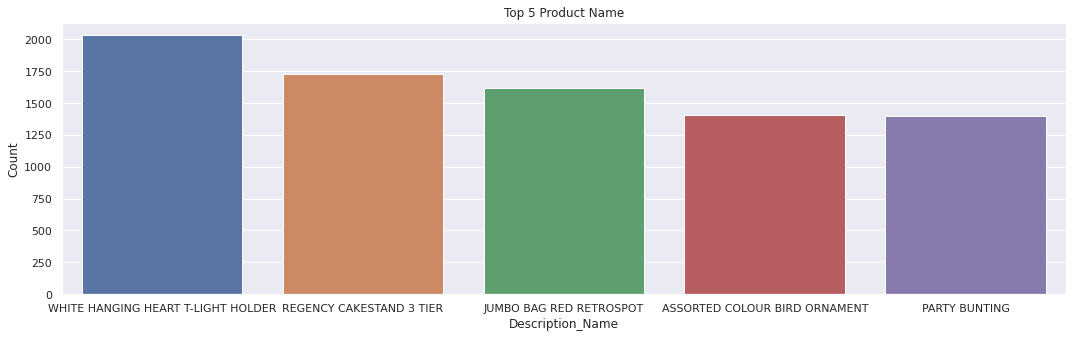

In [ ]:
#visualization of count of description name
plt.figure(figsize=(18,5))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

# Top product based on maximum selling are :

1.WHITE HANGING HEART T-LIGHT HOLDER,


2.REGENCY CAKESTAND 3 TIER


3.JUMBO BAG RED RETROSPOT


4.PARTY BUNTING


5.LUNCH BAG RED RETROSPOT

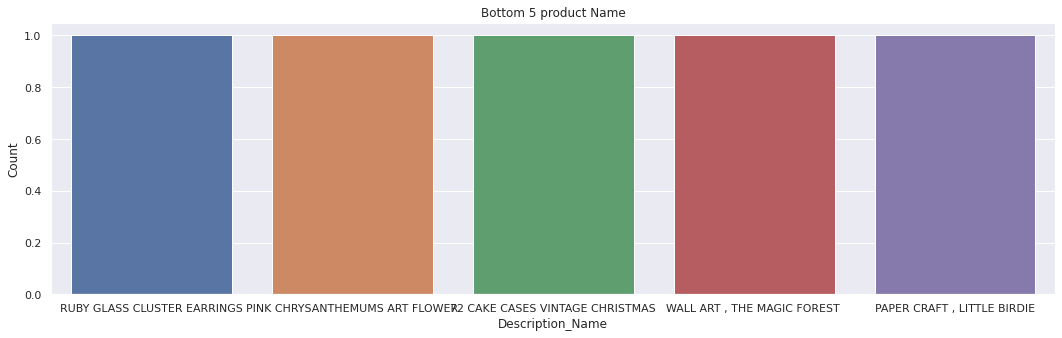

In [ ]:
#visualization of tail of description name
plt.figure(figsize=(18,5))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:])

# Bottom 5 Product based on the selling are:
1.LIGHT DECORATION BATTERY OPERATED

2.Water damaged

3.throw away

4.re dotcom quick fix.

5.BIRTHDAY BANNER TAPE

In [ ]:
#count of stockcode_name as higher count comes first
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2035
1,22423,1724
2,85099B,1618
3,84879,1408
4,47566,1397


In [ ]:
#count of stockcode from last
StockCode_df.tail()

,StockCode_Name,Count
3660,90168,1
3661,90169,1
3662,90202A,1
3663,90118,1
3664,23843,1


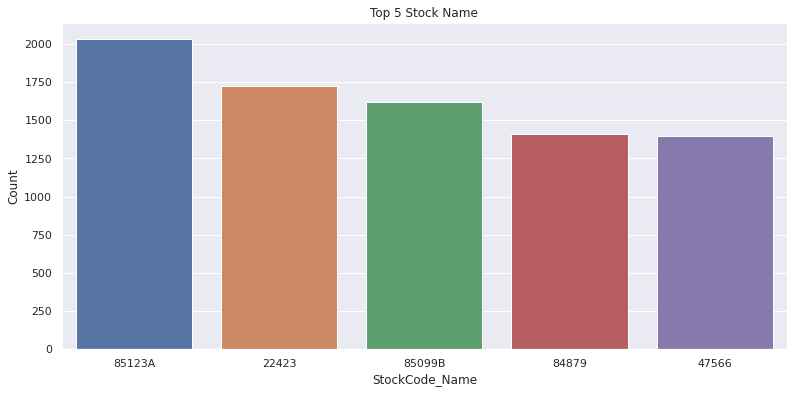

In [ ]:
#visualization of count of stock name
plt.figure(figsize=(13,6))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

# Top 5 Stock name based on selling are :

1.85123A


2.22423


3.85099B


4.47566


5.20725

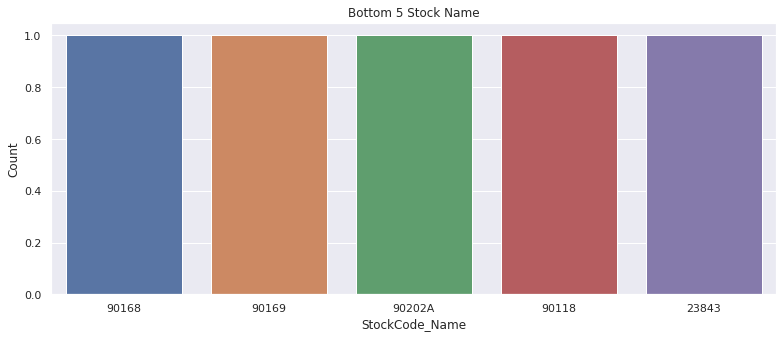

In [ ]:
#visualization
plt.figure(figsize=(13,5))
plt.title('Bottom 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[-5:])

In [ ]:
# Counting unique value of country_name as higher count comes first
country_df=df['Country'].value_counts().reset_index()
country_df.rename(columns={'index': 'Country_Name'}, inplace=True)
country_df.rename(columns={'Country': 'Count'}, inplace=True)
country_df.head()

,Country_Name,Count
0,United Kingdom,354345
1,Germany,9042
2,France,8342
3,EIRE,7238
4,Spain,2485


In [ ]:
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


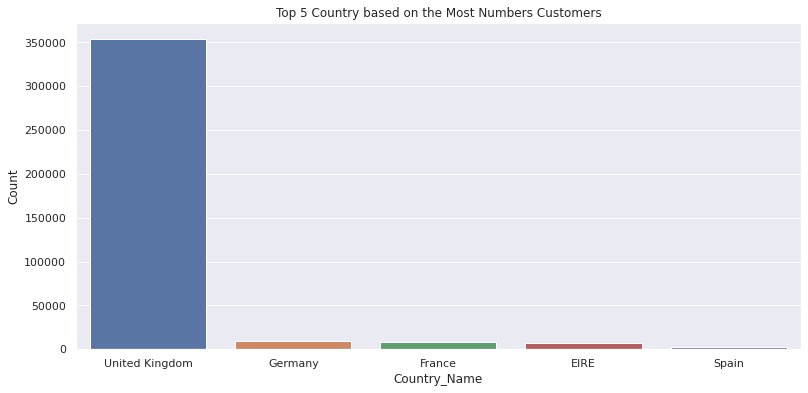

In [ ]:
#visualization of 'Top 5 Country based Most Numbers of  Customers'
plt.figure(figsize=(13,6))
plt.title('Top 5 Country based on the Most Numbers Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[:5])

## From this graph we can see that most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain

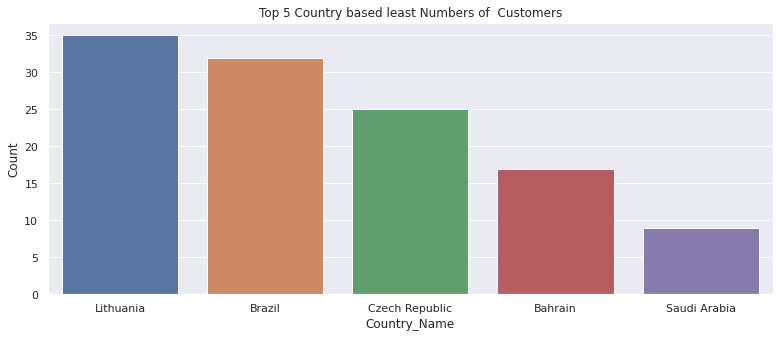

In [ ]:
#visualization of 'Top 5 Country based least Numbers of  Customers'
plt.figure(figsize=(13,5))
plt.title('Top 5 Country based least Numbers of  Customers')
sns.barplot(x='Country_Name',y='Count',data=country_df[-5:])

## From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia

In [ ]:
#exploring 'Saudi Arabia'
df[df['Country']=='Saudi Arabia']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
100810,544838,22915,ASSORTED BOTTLE TOP MAGNETS,12,2011-02-24 10:34:00,0.42,12565.0,Saudi Arabia
100811,544838,22363,GLASS JAR MARMALADE,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia
100812,544838,22362,GLASS JAR PEACOCK BATH SALTS,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia
100813,544838,22361,GLASS JAR DAISY FRESH COTTON WOOL,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia
100814,544838,22553,PLASTERS IN TIN SKULLS,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia
100815,544838,22555,PLASTERS IN TIN STRONGMAN,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia
100816,544838,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia
100817,544838,20781,GOLD EAR MUFF HEADPHONES,2,2011-02-24 10:34:00,5.49,12565.0,Saudi Arabia
100818,544838,22969,HOMEMADE JAM SCENTED CANDLES,12,2011-02-24 10:34:00,1.45,12565.0,Saudi Arabia


1.Positively skewed (or right-skewed) distribution is a type of distribution in which most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.hear mean>median>mode

2.Negatively skewed (also known as left-skewed) distribution is a type of distribution in which more values are concentrated on the right side (tail) of the distribution graph while the left tail of the distribution graph is longer.hear mean<median<mode

3.For symmetric graph mean=median=mode

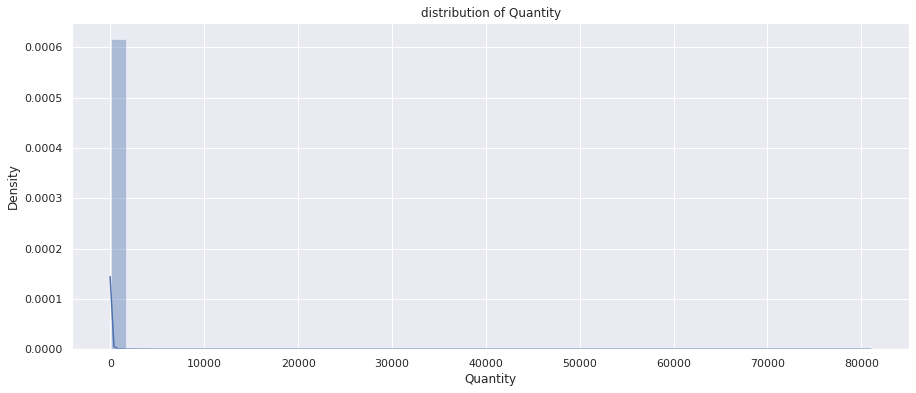

In [ ]:
#distribution of Quantity
plt.figure(figsize=(15,6))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="B")

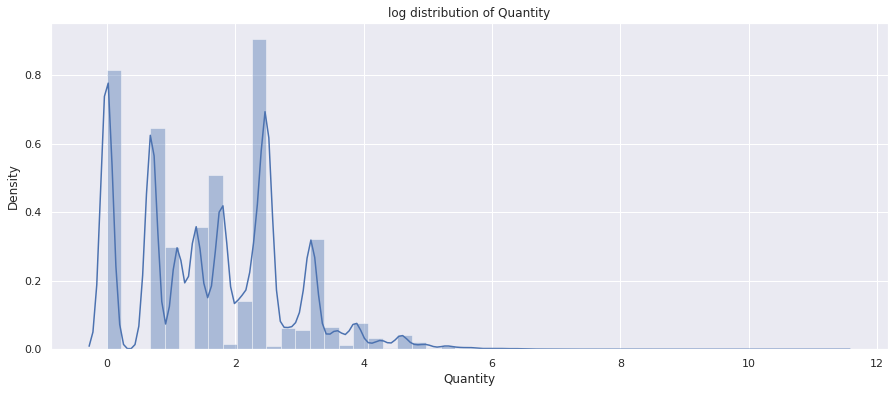

In [ ]:
#applying log distribution on quantity
plt.figure(figsize=(15,6))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

In [ ]:
#unique values of Quantity
df['Quantity'].unique()

array([    6,     8,     2,    32,     3,     4,    24,    12,    48,
          18,    20,    36,    80,    64,    10,   120,    96,    23,
           5,     1,    50,    40,   100,   192,   432,   144,   288,
          16,     9,   128,    25,    30,    28,     7,    72,   200,
         600,   480,    14,    11,    70,   252,    60,   216,   384,
          27,   108,    52,    75,   270,    42,   240,    90,   320,
          17,  1824,   204,    69,   160,  2880,  1400,    19,    39,
          56,    13,  1440,    15,   720,   156,   324,    41,   402,
         378,   150,   300,    22,    34,   408,   972,   208,  1008,
          26,  1000,  1488,   250,  1394,   400,   110,    37,    78,
          21,   272,    84,    47,  1728,    38,    53,    76,   576,
          29,  2400,   500,   180,   960,  1296,   147,   168,   256,
          54,    31,   860,  1010,  1356,  1284,   186,   114,   360,
        1930,  2000,  3114,  1300,   670,   176,   648,    62, 74215,
          89,    33,

In [ ]:
#Checking Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


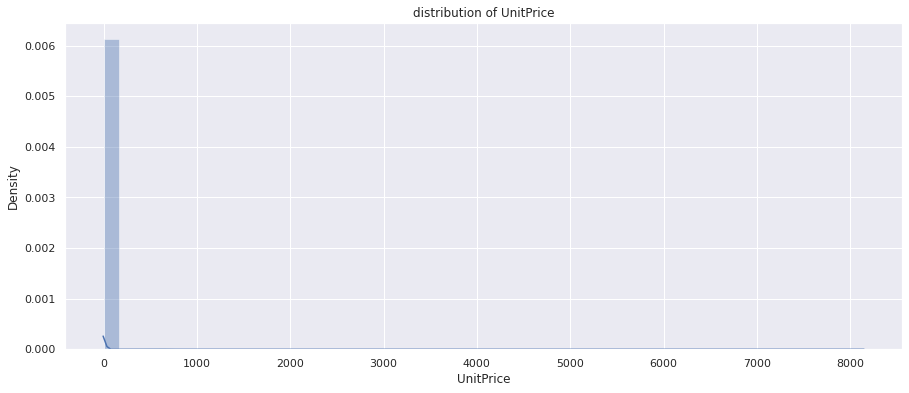

In [ ]:
#visualizing distribution of unit price
plt.figure(figsize=(15,6))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color="B")

In [ ]:
#checking dataset
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


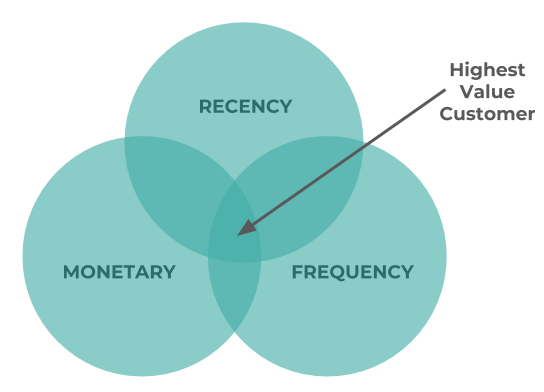

# Feature engineering

In [ ]:
#extracting Invoice Date
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")

## Convert InvoiceDate columns into date time formate

In [ ]:
#getting Day as feature
df['Day']=df['InvoiceDate'].dt.day_name()

## Create a new features Day from Invoicedate

In [ ]:
# Create some new features from Invoicedate like hours,year,month_num,day_num
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)

In [ ]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month_num,day_num,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26


## Create some new features from Invoicedate like hours, year, month_num, day_num

In [ ]:
#creating new feature (TotalAmount)
df['TotalAmount']=df['Quantity']*df['UnitPrice']

## Create a new features TotalAmount from product of Quantity and Unitprice

In [ ]:
# adding month name feature from Invoice Date feature
df['Month']=df['InvoiceDate'].dt.month_name()

In [ ]:
#checking changes
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month_num,day_num,hour,minute,TotalAmount,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,15.30,December
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,December


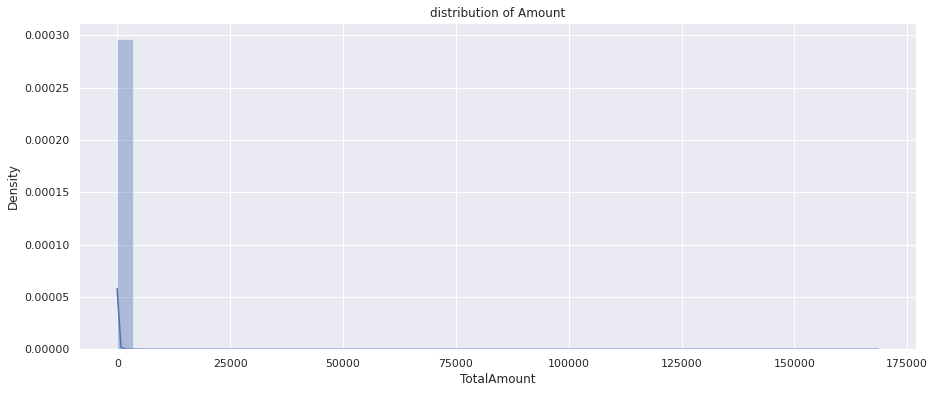

In [ ]:
#checking distribution of Total amount
plt.figure(figsize=(15,6))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="B")

In [ ]:
#get more clear view of Total Amount
df['TotalAmount'].describe()

count    397924.000000
mean         22.394749
std         309.055588
min           0.000000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: TotalAmount, dtype: float64

 It seems there can be outliers in Total Amount

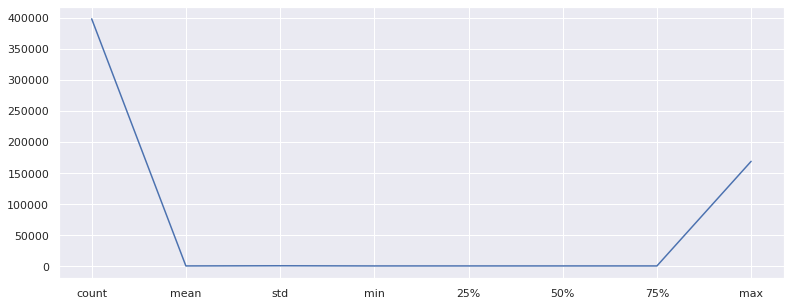

In [ ]:
#visualizing Total amount
plt.figure(figsize=(13,5))
df['TotalAmount'].describe().plot()

In [ ]:
#counting which day has highest count
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,80052
1,Wednesday,68888
2,Tuesday,66476
3,Monday,64899
4,Sunday,62775
5,Friday,54834


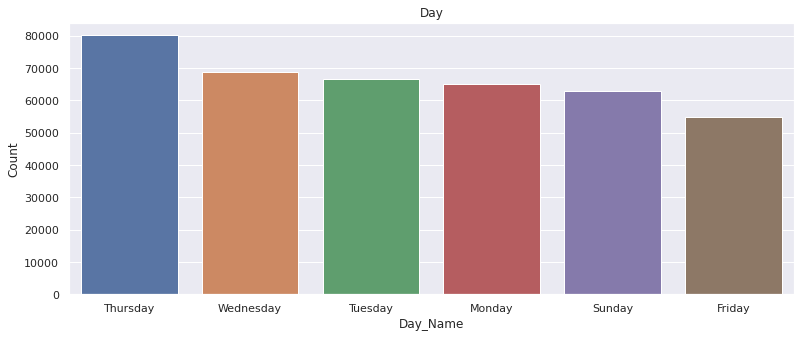

In [ ]:
# visualization of counting of 'which day has highest count'
plt.figure(figsize=(13,5))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

Most of the customers have purchesed the items in Thursday, Wednesday and Tuesday

In [ ]:
#counting which month has highest count
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,64545
1,October,49557
2,December,43464
3,September,40030
4,May,28322
5,June,27185
6,March,27177
7,August,27013
8,July,26827
9,April,22644


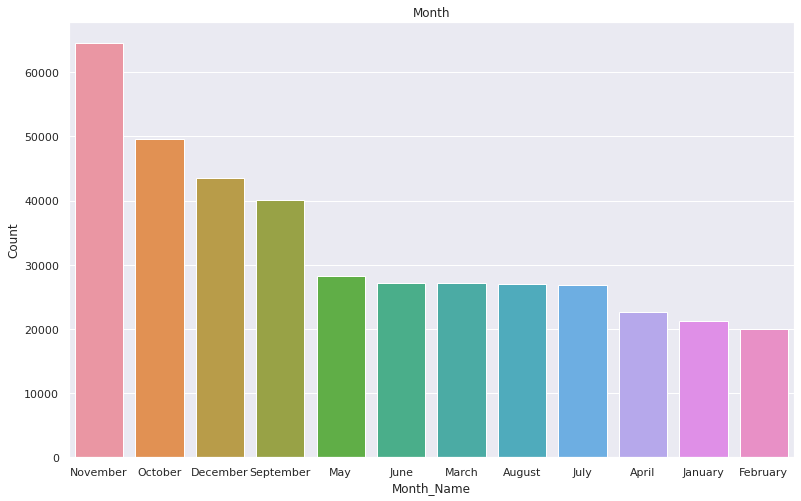

In [ ]:
# visualization on the basis of months
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df)


### most numbers of customers have purchesed the gifts in the month of November, October, December and September. Less numbers of customers have purchesed the gifts in the month of April, January and February

In [ ]:
# Counting which hour is the most productive for us
hour_df=df['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'hour': 'Count'}, inplace=True)
hour_df

,Hour_Name,Count
0,12,72069
1,13,64031
2,14,54127
3,11,49092
4,15,45372
5,10,37999
6,16,24093
7,9,21945
8,17,13072
9,8,8691


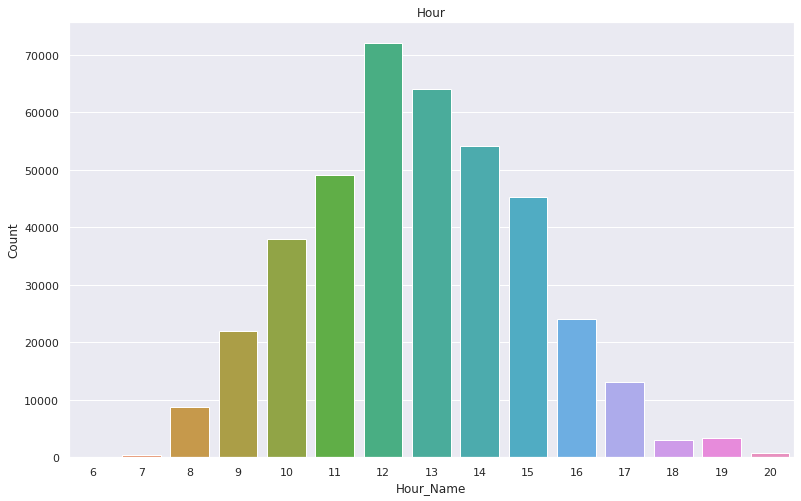

In [ ]:
# visualization of hours
plt.figure(figsize=(13,8))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

### From this graph we can see that in AfterNoon Time most of the customers have purchased items. 12th hour is the time where we can see most purchases.

In [ ]:
# clustering timings into a specific category
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
#processing time type
df['Time_type']=df['hour'].apply(time_type)

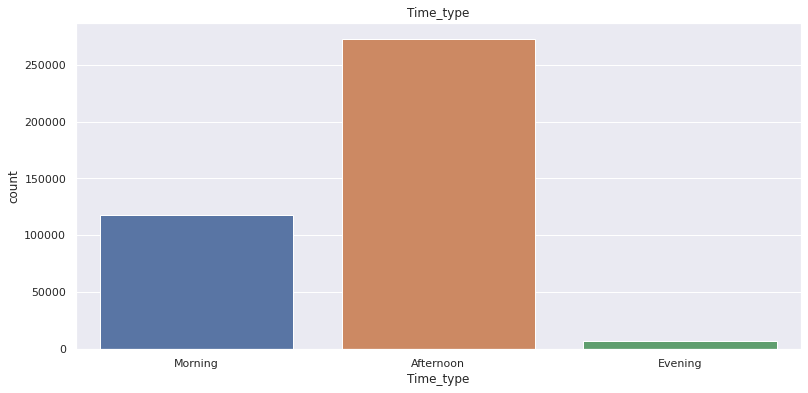

In [ ]:
#visualization of purchases on the basis of time type
plt.figure(figsize=(13,6))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df)


### Most of the customers have purchased the items in Afternoon, moderate numbers of customers have purchased the items in Morning and least numbers of customers have purchased the items in Evening

In [ ]:
#taking look
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month_num,day_num,hour,minute,TotalAmount,Month,Time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,15.30,December,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,2010,12,1,8,26,20.34,December,Morning


# Create the RFM model (Recency, Frequency, Monetary value)

In [ ]:
df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [ ]:
from datetime import date
 
# Returns the current local date
NOW = date.today()

In [ ]:
#Create RFM Modelling scores for each customer
rfmTable = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()), # Recency
                                        'InvoiceNo': lambda x: len(x),               # Frequency
                                        'TotalAmount': lambda x: x.sum()})          # Monetary Value
                                        
#Rename column names to Recency, Frequency and Monetary
rfmTable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'TotalAmount': 'monetary_value'}, inplace=True)

In [ ]:
rfmTable['recency'] = rfmTable['recency'].astype('timedelta64[D]')

In [ ]:
rfmTable.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,4398.0,1,77183.60
12347.0,4075.0,182,4310.00
12348.0,4148.0,31,1797.24
12349.0,4091.0,73,1757.55
12350.0,4383.0,17,334.40


In [ ]:
df[df.CustomerID == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,year,month_num,day_num,hour,minute,TotalAmount,Month,Time_type
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,Tuesday,2011,1,18,10,1,77183.6,January,Morning


In [ ]:

rfmSegmentation = rfmTable

## Split into four segments using quantiles

In [ ]:
#Split into four segments using quantiles
quantiles = rfmTable.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()


In [ ]:
quantiles

{'recency': {0.25: 4090.0, 0.5: 4123.0, 0.75: 4214.5},
 'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'monetary_value': {0.25: 307.24499999999995,
  0.5: 674.4499999999998,
  0.75: 1661.64}}

In [ ]:
#Functions to create R, F and M segments
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing df to show R, F and M segment values
rfmSegmentation['R_Quartile'] = rfmSegmentation['recency'].apply(RClass, args=('recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['frequency'].apply(FMClass, args=('frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['monetary_value'].apply(FMClass, args=('monetary_value',quantiles,))

In [ ]:
rfmSegmentation.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,4398.0,1,77183.60,4,4,1
12347.0,4075.0,182,4310.00,1,1,1
12348.0,4148.0,31,1797.24,3,3,1
12349.0,4091.0,73,1757.55,2,2,1
12350.0,4383.0,17,334.40,4,4,3


In [ ]:
#Calculate and Add RFMSegment value column showing combined concatenated score of RFM
rfmSegmentation['RFM_Segment'] = rfmSegmentation.R_Quartile.map(str)+rfmSegmentation.F_Quartile.map(str)+rfmSegmentation.M_Quartile.map(str)
rfmSegmentation.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_Segment
CustomerID,,,,,,,
12346.0,4398.0,1,77183.60,4,4,1,441
12347.0,4075.0,182,4310.00,1,1,1,111
12348.0,4148.0,31,1797.24,3,3,1,331
12349.0,4091.0,73,1757.55,2,2,1,221
12350.0,4383.0,17,334.40,4,4,3,443


In [ ]:

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfmSegmentation['RFM_Score'] = rfmSegmentation[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)


In [ ]:
rfmSegmentation.head()

,recency,frequency,monetary_value,R_Quartile,F_Quartile,M_Quartile,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,4398.0,1,77183.60,4,4,1,441,9
12347.0,4075.0,182,4310.00,1,1,1,111,3
12348.0,4148.0,31,1797.24,3,3,1,331,7
12349.0,4091.0,73,1757.55,2,2,1,221,5
12350.0,4383.0,17,334.40,4,4,3,443,11


In [ ]:
print("Best Customers: ",len(rfmSegmentation[rfmSegmentation['RFM_Segment']=='111']))
print('Loyal Customers: ',len(rfmSegmentation[rfmSegmentation['F_Quartile']==1]))
print("Big Spenders: ",len(rfmSegmentation[rfmSegmentation['M_Quartile']==1]))
print('Almost Lost: ', len(rfmSegmentation[rfmSegmentation['RFM_Segment']=='134']))
print('Lost Customers: ',len(rfmSegmentation[rfmSegmentation['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(rfmSegmentation[rfmSegmentation['RFM_Segment']=='444']))

Best Customers:  440
Loyal Customers:  1080
Big Spenders:  1085
Almost Lost:  25
Lost Customers:  181
Lost Cheap Customers:  384


In [ ]:
rfmSegmentation['recency'].skew()

1.2461369784209326

In [ ]:
rfmSegmentation['frequency'].skew()

18.106242903118684

In [ ]:
rfmSegmentation['monetary_value'].skew()

19.326985305561827

In [ ]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

recency's: Skew: 1.2457061452812315, : SkewtestResult(statistic=26.61116908434076, pvalue=5.040901564566072e-156)
frequency's: Skew: 18.09998294164316, : SkewtestResult(statistic=83.57008377610094, pvalue=0.0)
monetary_value's: Skew: 19.320303290739744, : SkewtestResult(statistic=85.00748886946815, pvalue=0.0)


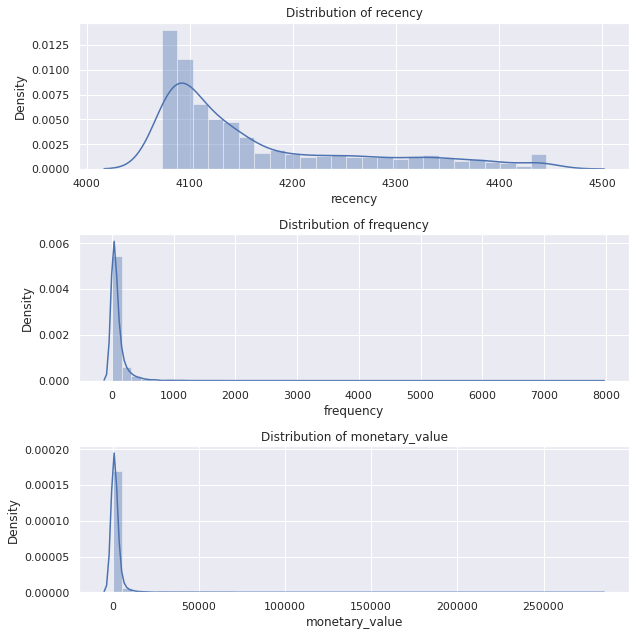

In [ ]:
df_rfm_log = rfmTable.copy()


plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'frequency')

plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'monetary_value')

plt.tight_layout()


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_scaled = scaler.transform(df_rfm_log)
RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns=df_rfm_log.columns)

**K means Clustering**


Finding the optimal number of clusters

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(RFM_Table_scaled) 
    kmeanModel.fit(RFM_Table_scaled)     
      
    distortions.append(sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / RFM_Table_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / RFM_Table_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

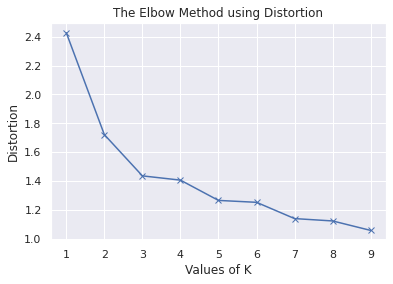

In [ ]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

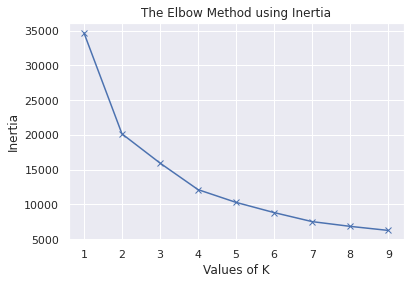

In [ ]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 


In [ ]:
from sklearn.manifold import TSNE
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

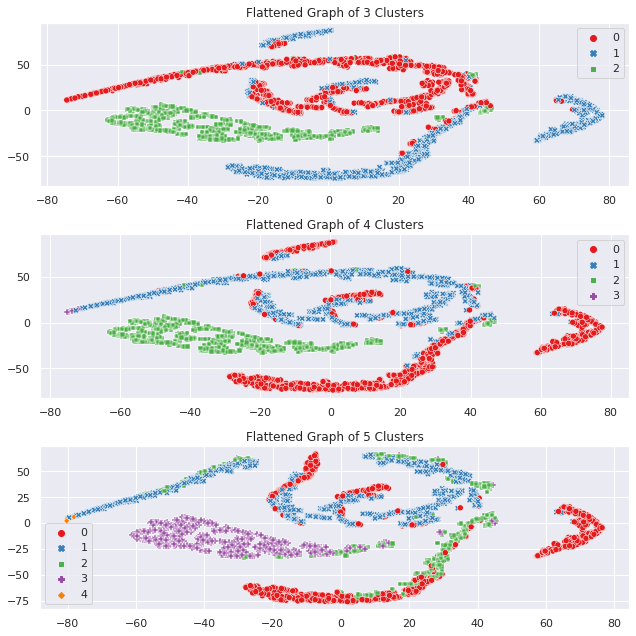

In [ ]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_scaled, 3, rfmTable)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_scaled, 4, rfmTable)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_scaled, 5, rfmTable)

plt.tight_layout()

We can observe four clusters from the KMeans model applied on Recency and Monetary data:

Optimal k mean is 4 and  

Red show they are new customers
blue plot show that they are casual customer and not purchase regularly
green and purple color point shows that they are regualr and impact moderatly on montery wise


## **DBSCAN**

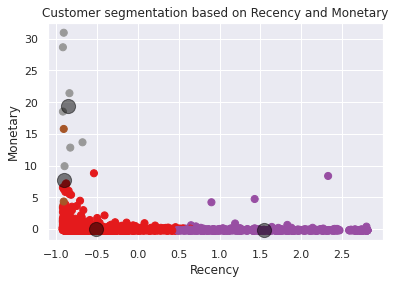

In [ ]:
# KMean with k= 4
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_km = kmeans.predict(X)

# plot the clusters
plt.title('Customer segmentation based on Recency and Monetary')
plt.scatter(X[:,0], X[:,1], c=y_km, s=50, cmap='Set1')
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_rec_mon=['recency','monetary_value','frequency']
X_features_rec_mon=rfmTable[features_rec_mon].valuesX_features_rec_mon=rfmTable[features_rec_mon].values


RFM_Table_scaled=scaler.fit_transform(X_features_rec_mon)
X=RFM_Table_scaled

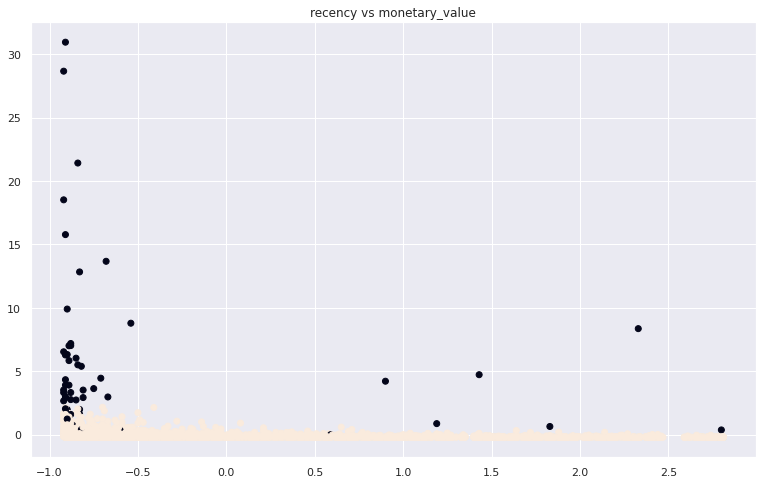

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_pred = DBSCAN(eps=0.5, min_samples=10).fit_predict(X)
plt.figure(figsize=(13,8))
plt.title('recency vs monetary_value, frequency')
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()

cluster on the basis of frequency, monetry, and recency with optimal value k= 4

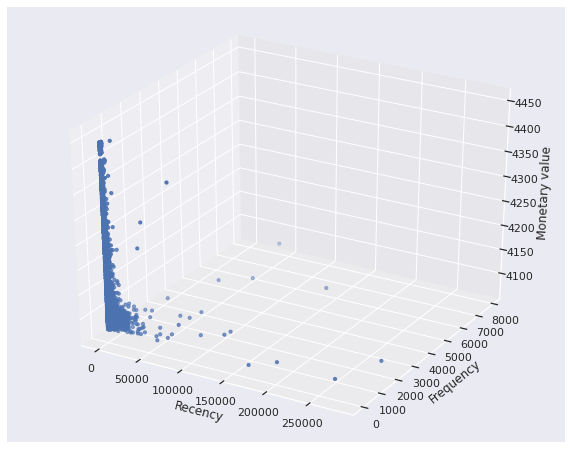

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,8))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=rfmTable.recency
ys=rfmTable.frequency
zs=rfmTable.monetary_value
ax.scatter(zs,ys,xs,s=10)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

# **Conclusion:**

1. UK had most and Russia had least number of customers

2. HITE HANGING HEART T-LIGHT HOLDER,REGENCY CAKE was the highest purchased product

3. LIGHT DECORATION BATTERY OPERATED,Water damaged were the least selling product

4. Thursday (80052) had higest purchased day

5. Mostly people prefered purchasing on After-noon time.

6. By applying Kmean and elbow method we found that Optimal number of cluster is k=4 and segregate the new customer, regular purased customers accordingly.
